In [16]:
import pandas as pd
import re
import time
from numpy import array
from keras import Input, Model
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.activations import softmax
from keras.layers import Embedding, LSTM, Dense
import tensorflow as tf
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
import random
from sklearn.model_selection import train_test_split

from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [17]:
df = pd.read_excel('D:/Coventry/Chatbot/Chatdata/Quries_in_English.xlsx')

In [18]:
df.shape

(797, 2)

In [19]:
df.head()

,Questions,Answers
0,What is the method to get DMC?,Procedure for incomplete DMC is:-\n1)\tApply o...
1,How to get incomplete DMC?,Procedure for incomplete DMC is:-\n1)\tApply o...
2,How to get transcript or DMC?,Procedure for incomplete DMC is:-\n1)\tApply o...
3,List the documents needed for DMC?,Attach following documents:-\na)\tDMC form\nb)...
4,What is the procedure to get final or incomple...,Procedure for complete/final DMC for students...


In [20]:
df_n = df[df['Answers'].isnull()]

In [21]:
df_n

,Questions,Answers
792,What time is it?,NaN


In [22]:
df.tail()

,Questions,Answers
792,What time is it?,NaN
793,What are your hobbies?,To help people find answers
794,What do you look like?,I have never seen Myself
795,What’s your expertise?,To Answer Question
796,What do you like to eat?,Electricity :p


In [23]:
df = df.dropna()

In [24]:
df.tail(10)

,Questions,Answers
786,What is your name?,Probot
787,How old are you?,Are you going to make my ID Card?
788,Where do you live?,In this computer
789,How can you help me?,By answering your question related to UET Admi...
790,Which languages do you speak?,English
791,How are you? Are you doing ok?,I am feeling great. What about you???
793,What are your hobbies?,To help people find answers
794,What do you look like?,I have never seen Myself
795,What’s your expertise?,To Answer Question
796,What do you like to eat?,Electricity :p


In [25]:
df = df.reset_index(drop=True)

In [26]:
df.tail(100)

,Questions,Answers
696,Can I select multiple preferences?,"There is no limit of number of preferences, yo..."
697,"I have selected wrong preference, can I change...","yes, There is no limit of number of preference..."
698,I have applied online for admission but did no...,"Change of preference is not allowed, However, ..."
699,Is it compulsory to submit hard copy/documents...,Submission of hard copies and dues is compulso...
700,Can I send hard copies through courier?,Submission of hard copies and dues is compulso...
...,...,...
791,How are you? Are you doing ok?,I am feeling great. What about you???
792,What are your hobbies?,To help people find answers
793,What do you look like?,I have never seen Myself
794,What’s your expertise?,To Answer Question


In [27]:
def clean_text(text_to_clean):
    res = text_to_clean.lower()
    res = re.sub(r"i'm", "i am", res)
    res = re.sub(r"he's", "he is", res)
    res = re.sub(r"she's", "she is", res)
    res = re.sub(r"it's", "it is", res)
    res = re.sub(r"that's", "that is", res)
    res = re.sub(r"what's", "what is", res)
    res = re.sub(r"where's", "where is", res)
    res = re.sub(r"how's", "how is", res)
    res = re.sub(r"\'ll", " will", res)
    res = re.sub(r"\'ve", " have", res)
    res = re.sub(r"\'re", " are", res)
    res = re.sub(r"\'d", " would", res)
    res = re.sub(r"\'re", " are", res)
    res = re.sub(r"won't", "will not", res)
    res = re.sub(r"can't", "cannot", res)
    res = re.sub(r"n't", " not", res)
    res = re.sub(r"n'", "ng", res)
    res = re.sub(r"'bout", "about", res)
    res = re.sub(r"'til", "until", res)
    res = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", res)
    res = re.sub(r"[^\w\s]", "", res)
    return res

In [28]:
df.head()

,Questions,Answers
0,What is the method to get DMC?,Procedure for incomplete DMC is:-\n1)\tApply o...
1,How to get incomplete DMC?,Procedure for incomplete DMC is:-\n1)\tApply o...
2,How to get transcript or DMC?,Procedure for incomplete DMC is:-\n1)\tApply o...
3,List the documents needed for DMC?,Attach following documents:-\na)\tDMC form\nb)...
4,What is the procedure to get final or incomple...,Procedure for complete/final DMC for students...


In [29]:
print(len(df['Answers'][7]))

134


In [30]:
clean_q = []
clean_a = []

for line in df['Questions']:
    clean_q.append(clean_text(line))
        
for line in df['Answers']:
    clean_a.append(clean_text(line))

In [31]:
clean_a[0]

'procedure for incomplete dmc is\n1\tapply on dmc form \n2\tattach challan of rs 300  account no 01287901582203 title student dues uet lhr online challan from lms account can be generated or bank deposit slip can be used\nprocedure for completefinal dmc for uet lahore students is\nbefore applying for finalcomplete dmc for 1st time only final year students should follow below instructionsfor undergraduate session 2015  postgraduate session 2016 onwards\n\n1\tfill exit survey and all subject surveys\t\n2\tmake sure your proper picture is uploaded on lms for this purpose check your profile under student information option in your lms account your picture must be clear and properly visible in case of any issue regarding picture visit admission cell admin block bringing your picture ibm students have this facility in their department\n3\tmake sure your online departmental clearance is made by your lms coordinator\n4\tattach following documents\n       a\tdmc form\n       b\tcnic copy\n     

In [32]:
print(len(clean_a[7]))

126


In [33]:
ques = []
ans = []
for i in range(len(clean_q)):
    if len(clean_a[i]) < 300:
        ques.append(clean_q[i])
        ans.append('<START> ' +clean_a[i]+ ' <END>')

In [34]:
del(clean_q, clean_a)

In [35]:
len(ques)

766

In [36]:
len(ans)

766

In [37]:
ans[0]

'<START> ans official timing to get dmc is 3 working days <END>'

In [38]:
print("Questions in dataset: {}".format(len(ques)))
print("Answers in dataset: {}".format(len(ans)))

Questions in dataset: 766
Answers in dataset: 766


In [39]:
target_regex = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n\''
# Tokenizer allows to vectorize our corpus by turning each sentence
# into a sequence of integers where each integer is an index
# of a token in an internal dictionary
tokenizer = Tokenizer(filters=target_regex)
tokenizer.fit_on_texts(ques + ans)
VOCAB_SIZE = len(tokenizer.word_index) + 1
# size of our vocabulary
print('Vocabulary size : {}'.format(VOCAB_SIZE))

Vocabulary size : 1503


In [40]:
tokenized_questions = tokenizer.texts_to_sequences(ques)
# maximum question length 
maxlen_questions = max([len(x) for x in tokenized_questions])
print(maxlen_questions)

26


In [41]:
# pad each question with zeros at the end to be 26 words long
encoder_input_data = pad_sequences(tokenized_questions, 
                                 maxlen=maxlen_questions,
                                 padding='post')

print(encoder_input_data.shape)

(766, 26)


In [42]:
tokenized_answers = tokenizer.texts_to_sequences(ans)
# maximum answer length 
maxlen_answers = max([len(x) for x in tokenized_answers])
print(maxlen_answers)

52


In [43]:
# pad each answer with zeros at the end to be 50 words long
decoder_input_data = pad_sequences(tokenized_answers,   
                                   maxlen=maxlen_answers,
                                   padding='post')

print(decoder_input_data.shape)

(766, 52)


In [44]:
# remove the first 'start' word from every answer
for i in range(len(tokenized_answers)):
    tokenized_answers[i] = tokenized_answers[i][1:]
# pad answers with zeros
padded_answers = pad_sequences(tokenized_answers, maxlen=maxlen_answers, padding='post')

decoder_output_data= to_categorical(padded_answers, VOCAB_SIZE)
print(decoder_output_data.shape)

(766, 52, 1503)


In [45]:
print(len(encoder_input_data[0]))

26


In [43]:
#X = [encoder_input_data , decoder_input_data]

In [50]:
#X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(encoder_input_data, decoder_output_data, test_size = 0.3, random_state = 4)

In [51]:
#X_train_de, X_test_de, y_train_de, y_test_de = train_test_split(decoder_input_data, decoder_output_data, test_size = 0.3, random_state = 4)

In [46]:
# encoder will be used to capture space-dependent 
# relations between words from the questions
enc_inputs = Input(shape=(None,))
enc_embedding = Embedding(VOCAB_SIZE, 200, mask_zero=True)(enc_inputs)
enc_outputs, state_h, state_c = LSTM(200, return_state=True)(enc_embedding)
enc_states = [state_h, state_c]
# decoder will be used to capture space-dependent relations 
# between words from the answers using encoder's 
# internal state as a context
dec_inputs = Input(shape=(None,))
dec_embedding = Embedding(VOCAB_SIZE, 200, mask_zero=True)(dec_inputs)
dec_lstm = LSTM(200, return_state=True, return_sequences=True)
dec_outputs, _, _ = dec_lstm(dec_embedding,  
                             initial_state=enc_states)
# decoder is connected to the output Dense layer
dec_dense = Dense(VOCAB_SIZE, activation=softmax)
output = dec_dense(dec_outputs)
model = Model([enc_inputs, dec_inputs], output)
# output of this network will look like this:
# y_true = [0.05, 0.95, 0...]
# and expected one-hot encoded output like this:
# y_pred = [0, 1, 0...]
sgd = SGD(learning_rate=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 200)    300600      ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, None, 200)    300600      ['input_2[0][0]']                
                                                                                              

In [47]:
r = model.fit([encoder_input_data, decoder_input_data], 
          decoder_output_data, 
          batch_size=20, 
          epochs=200)

Epoch 1/200
39/39 [==============================] - 23s 236ms/step - loss: 2.0834 - acc: 0.0060
Epoch 2/200
39/39 [==============================] - 7s 189ms/step - loss: 2.0829 - acc: 0.0654
Epoch 3/200
39/39 [==============================] - 7s 191ms/step - loss: 2.0824 - acc: 0.0821
Epoch 4/200
39/39 [==============================] - 7s 189ms/step - loss: 2.0818 - acc: 0.0825
Epoch 5/200
39/39 [==============================] - 7s 190ms/step - loss: 2.0813 - acc: 0.0836
Epoch 6/200
39/39 [==============================] - 7s 190ms/step - loss: 2.0807 - acc: 0.0843
Epoch 7/200
39/39 [==============================] - 7s 186ms/step - loss: 2.0802 - acc: 0.0845
Epoch 8/200
39/39 [==============================] - 7s 182ms/step - loss: 2.0797 - acc: 0.0854
Epoch 9/200
39/39 [==============================] - 7s 183ms/step - loss: 2.0791 - acc: 0.0864
Epoch 10/200
39/39 [==============================] - 7s 188ms/step - loss: 2.0786 - acc: 0.0866
Epoch 11/200
39/39 [==================

39/39 [==============================] - 7s 177ms/step - loss: 2.0271 - acc: 0.0702
Epoch 86/200
39/39 [==============================] - 7s 183ms/step - loss: 2.0259 - acc: 0.0702
Epoch 87/200
39/39 [==============================] - 7s 178ms/step - loss: 2.0247 - acc: 0.0698
Epoch 88/200
39/39 [==============================] - 7s 182ms/step - loss: 2.0235 - acc: 0.0695
Epoch 89/200
39/39 [==============================] - 8s 199ms/step - loss: 2.0222 - acc: 0.0694
Epoch 90/200
39/39 [==============================] - 8s 194ms/step - loss: 2.0208 - acc: 0.0694
Epoch 91/200
39/39 [==============================] - 8s 196ms/step - loss: 2.0194 - acc: 0.0693
Epoch 92/200
39/39 [==============================] - 8s 202ms/step - loss: 2.0179 - acc: 0.0689
Epoch 93/200
39/39 [==============================] - 7s 190ms/step - loss: 2.0164 - acc: 0.0688
Epoch 94/200
39/39 [==============================] - 7s 183ms/step - loss: 2.0148 - acc: 0.0687
Epoch 95/200
39/39 [=======================

39/39 [==============================] - 7s 188ms/step - loss: 1.7817 - acc: 0.0709
Epoch 169/200
39/39 [==============================] - 8s 196ms/step - loss: 1.7796 - acc: 0.0708
Epoch 170/200
39/39 [==============================] - 8s 202ms/step - loss: 1.7775 - acc: 0.0707
Epoch 171/200
39/39 [==============================] - 7s 178ms/step - loss: 1.7755 - acc: 0.0707
Epoch 172/200
39/39 [==============================] - 7s 187ms/step - loss: 1.7735 - acc: 0.0708
Epoch 173/200
39/39 [==============================] - 7s 176ms/step - loss: 1.7715 - acc: 0.0708
Epoch 174/200
39/39 [==============================] - 7s 188ms/step - loss: 1.7695 - acc: 0.0706
Epoch 175/200
39/39 [==============================] - 7s 186ms/step - loss: 1.7675 - acc: 0.0705
Epoch 176/200
39/39 [==============================] - 7s 178ms/step - loss: 1.7656 - acc: 0.0706
Epoch 177/200
39/39 [==============================] - 7s 187ms/step - loss: 1.7636 - acc: 0.0705
Epoch 178/200
39/39 [=============

In [48]:
model.save('chatbot_model_g_sgd.h5', r)

In [56]:
r = model.fit([X_train_en, X_train_de],
          y_train_en,
          validation_data=([X_test_en, X_test_de], y_test_en),
          epochs=200,
          batch_size=20)

Epoch 1/200
27/27 [==============================] - 11s 409ms/step - loss: 3.4803e-04 - acc: 0.9990 - val_loss: 6.7242e-04 - val_acc: 0.9984
Epoch 2/200
27/27 [==============================] - 6s 234ms/step - loss: 4.7444e-04 - acc: 0.9992 - val_loss: 0.0015 - val_acc: 0.9981
Epoch 3/200
27/27 [==============================] - 6s 219ms/step - loss: 0.0012 - acc: 0.9988 - val_loss: 0.0018 - val_acc: 0.9975
Epoch 4/200
27/27 [==============================] - 6s 226ms/step - loss: 4.2746e-04 - acc: 0.9993 - val_loss: 0.0026 - val_acc: 0.9973
Epoch 5/200
27/27 [==============================] - 6s 221ms/step - loss: 4.2312e-04 - acc: 0.9993 - val_loss: 0.0023 - val_acc: 0.9981
Epoch 6/200
27/27 [==============================] - 6s 219ms/step - loss: 0.0029 - acc: 0.9983 - val_loss: 0.0024 - val_acc: 0.9975
Epoch 7/200
27/27 [==============================] - 6s 223ms/step - loss: 5.3231e-04 - acc: 0.9991 - val_loss: 0.0027 - val_acc: 0.9973
Epoch 8/200
27/27 [=========================

27/27 [==============================] - 6s 216ms/step - loss: 2.0436e-04 - acc: 0.9995 - val_loss: 0.0058 - val_acc: 0.9984
Epoch 120/200
27/27 [==============================] - 6s 216ms/step - loss: 2.0289e-04 - acc: 0.9995 - val_loss: 0.0058 - val_acc: 0.9984
Epoch 121/200
27/27 [==============================] - 6s 215ms/step - loss: 2.0374e-04 - acc: 0.9995 - val_loss: 0.0058 - val_acc: 0.9984
Epoch 122/200
27/27 [==============================] - 6s 215ms/step - loss: 2.0614e-04 - acc: 0.9995 - val_loss: 0.0058 - val_acc: 0.9984
Epoch 123/200
27/27 [==============================] - 6s 223ms/step - loss: 2.0101e-04 - acc: 0.9995 - val_loss: 0.0059 - val_acc: 0.9984
Epoch 124/200
27/27 [==============================] - 6s 223ms/step - loss: 2.0006e-04 - acc: 0.9993 - val_loss: 0.0059 - val_acc: 0.9984
Epoch 125/200
27/27 [==============================] - 6s 221ms/step - loss: 2.0333e-04 - acc: 0.9995 - val_loss: 0.0059 - val_acc: 0.9984
Epoch 126/200
27/27 [====================

27/27 [==============================] - 6s 214ms/step - loss: 1.9773e-04 - acc: 0.9995 - val_loss: 0.0064 - val_acc: 0.9984
Epoch 179/200
27/27 [==============================] - 6s 221ms/step - loss: 2.0350e-04 - acc: 0.9993 - val_loss: 0.0064 - val_acc: 0.9984
Epoch 180/200
27/27 [==============================] - 6s 216ms/step - loss: 2.0118e-04 - acc: 0.9995 - val_loss: 0.0063 - val_acc: 0.9984
Epoch 181/200
27/27 [==============================] - 6s 214ms/step - loss: 2.0374e-04 - acc: 0.9995 - val_loss: 0.0064 - val_acc: 0.9984
Epoch 182/200
27/27 [==============================] - 6s 215ms/step - loss: 2.0335e-04 - acc: 0.9993 - val_loss: 0.0064 - val_acc: 0.9984
Epoch 183/200
27/27 [==============================] - 6s 214ms/step - loss: 2.0734e-04 - acc: 0.9995 - val_loss: 0.0064 - val_acc: 0.9984
Epoch 184/200
27/27 [==============================] - 6s 216ms/step - loss: 1.9871e-04 - acc: 0.9993 - val_loss: 0.0064 - val_acc: 0.9984
Epoch 185/200
27/27 [====================

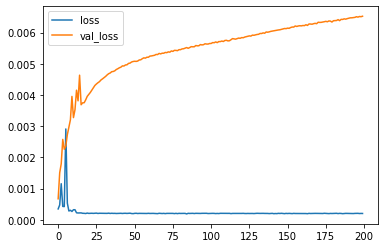

In [57]:
# Plot for loss

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

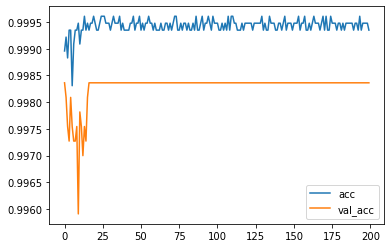

In [60]:
# plot for accuracy
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

In [49]:
def make_inference_models():
    dec_state_input_h = Input(shape=(200,))
    dec_state_input_c = Input(shape=(200,))
    dec_states_inputs = [dec_state_input_h, dec_state_input_c]
    dec_outputs, state_h, state_c = dec_lstm(dec_embedding,
                                             initial_state=dec_states_inputs)
    dec_states = [state_h, state_c]
    dec_outputs = dec_dense(dec_outputs)
    dec_model = Model(
        inputs=[dec_inputs] + dec_states_inputs,
        outputs=[dec_outputs] + dec_states)
    print('Inference decoder:')
    dec_model.summary()
    print('Inference encoder:')
    enc_model = Model(inputs=enc_inputs, outputs=enc_states)
    enc_model.summary()
    return enc_model, dec_model

In [50]:
enc_model, dec_model = make_inference_models()

Inference decoder:
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 200)    300600      ['input_2[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 200)]        0           []                               
                                                                         

In [51]:
enc_model.save('chatbot_model_g_enc.h5', enc_model)

In [52]:
dec_model.save('chatbot_model_g_dec.h5', dec_model)

In [53]:
import pickle

# saving
with open('tokenizer_g.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [37]:
def str_to_tokens(sentence: str):
    # convert input string to lowercase, 
    # then split it by whitespaces
    words = sentence.lower().split()
    # and then convert to a sequence 
    # of integers padded with zeros
    tokens_list = list()
    for current_word in words:
        result = tokenizer.word_index.get(current_word, '')
        if result != '':
            tokens_list.append(result)
    return pad_sequences([tokens_list],
                         maxlen=maxlen_questions,
                         padding='post')

In [38]:
from keras.preprocessing.sequence import pad_sequences
print("##########################################")
print("#       start chatting ver. 1.0          #")
print("##########################################")


prepro1 = ""
while prepro1 != 'q':
    prepro1  = input("you : ")
    ## prepro1 = "Hello"

    prepro1 = clean_text(prepro1)
    ## prepro1 = "hello"
    txt = str_to_tokens(prepro1)

    ## txt = [[454,0,0,0,.........13]]

    stat = enc_model.predict( txt )

    empty_target_seq = np.zeros( ( 1 , 1) )
     ##   empty_target_seq = [0]


    empty_target_seq[0, 0] = tokenizer.word_index['start']
    ##    empty_target_seq = [255]

    stop_condition = False
    decoded_translation = ''

    while not stop_condition :

        dec_outputs , h, c= dec_model.predict([ empty_target_seq] + stat )
        #decoder_concat_input = dense(dec_outputs)
        ## decoder_concat_input = [0.1, 0.2, .4, .0, ...............]

        #sampled_word_index = np.argmax( decoder_concat_input[0, -1, :] )
        sampled_word_index = np.argmax( dec_outputs[0, -1, :] )
        ## sampled_word_index = [2]

        sampled_word = None
        # append the sampled word to the target sequence
        for word, index in tokenizer.word_index.items():
            if sampled_word_index == index:
                if word != 'end':
                    decoded_translation += ' {}'.format(word)
                sampled_word = word
        # repeat until we generate the end-of-sequence word 'end' 
        # or we hit the length of answer limit
        if sampled_word == 'end' \
                or len(decoded_translation.split()) \
                > maxlen_answers:
            stop_condition = True

        empty_target_seq = np.zeros( ( 1 , 1 ) )  
        empty_target_seq[ 0 , 0 ] = sampled_word_index
        ## <SOS> - > hi
        ## hi --> <EOS>
        stat = [h, c]  

    print("chatbot attention : ", decoded_translation )
    print("==============================================")  

##########################################
#       start chatting ver. 1.0          #
##########################################
you : how to pay the hostel fee
chatbot attention :   challan form is automatically generated when student applies for hostel facility after paying fee submit challan copy in senior warden office 04299029225
you : what do you eat
chatbot attention :   electricity p
you : when second merit list will be displayed
chatbot attention :   1st merit list will be displayed on date of display of merit lists is also mentioned in prospectus
you : what you eat
chatbot attention :   it located on ground floor admin block
you : what do you eat
chatbot attention :   electricity p
you : where is the library
chatbot attention :   near to ce building
you : q
chatbot attention :   apply for the students of every hostel and students dont get information however meeting


In [132]:
for _ in range(100):
    # encode the input sequence into state vectors
    states_values = enc_model.predict(
        str_to_tokens(input('Enter question : ')))
    # start with a target sequence of size 1 - word 'start'   
    empty_target_seq = np.zeros((1, 1))
    empty_target_seq[0, 0] = tokenizer.word_index['start']
    stop_condition = False
    decoded_translation = ''
    while not stop_condition:
        # feed the state vectors and 1-word target sequence 
        # to the decoder to produce predictions for the next word
        dec_outputs, h, c = dec_model.predict([empty_target_seq] 
                                              + states_values)         
        # sample the next word using these predictions
        sampled_word_index = np.argmax(dec_outputs[0, -1, :])
        sampled_word = None
        # append the sampled word to the target sequence
        for word, index in tokenizer.word_index.items():
            if sampled_word_index == index:
                if word != 'end':
                    decoded_translation += ' {}'.format(word)
                sampled_word = word
        # repeat until we generate the end-of-sequence word 'end' 
        # or we hit the length of answer limit
        if sampled_word == 'end' \
                or len(decoded_translation.split()) \
                > maxlen_answers:
            stop_condition = True
        # prepare next iteration
        empty_target_seq = np.zeros((1, 1))
        empty_target_seq[0, 0] = sampled_word_index
        states_values = [h, c]
    print(decoded_translation)

Enter question : how to pay the hostel fee
 challan form is automatically generated when student applies for hostel facility after paying fee submit challan copy in senior warden office 04299029225
Enter question : what do you like to eat?
 i have never seen myself
Enter question : what do you eat?
 no i am a software
Enter question : when second merit list will be displayed
 1st merit list will be displayed on date of display of merit lists is also mentioned in prospectus
Enter question : can i select multiple preferences
 there is no limit of number of preferences you can select any number of preferences


KeyboardInterrupt: Interrupted by user